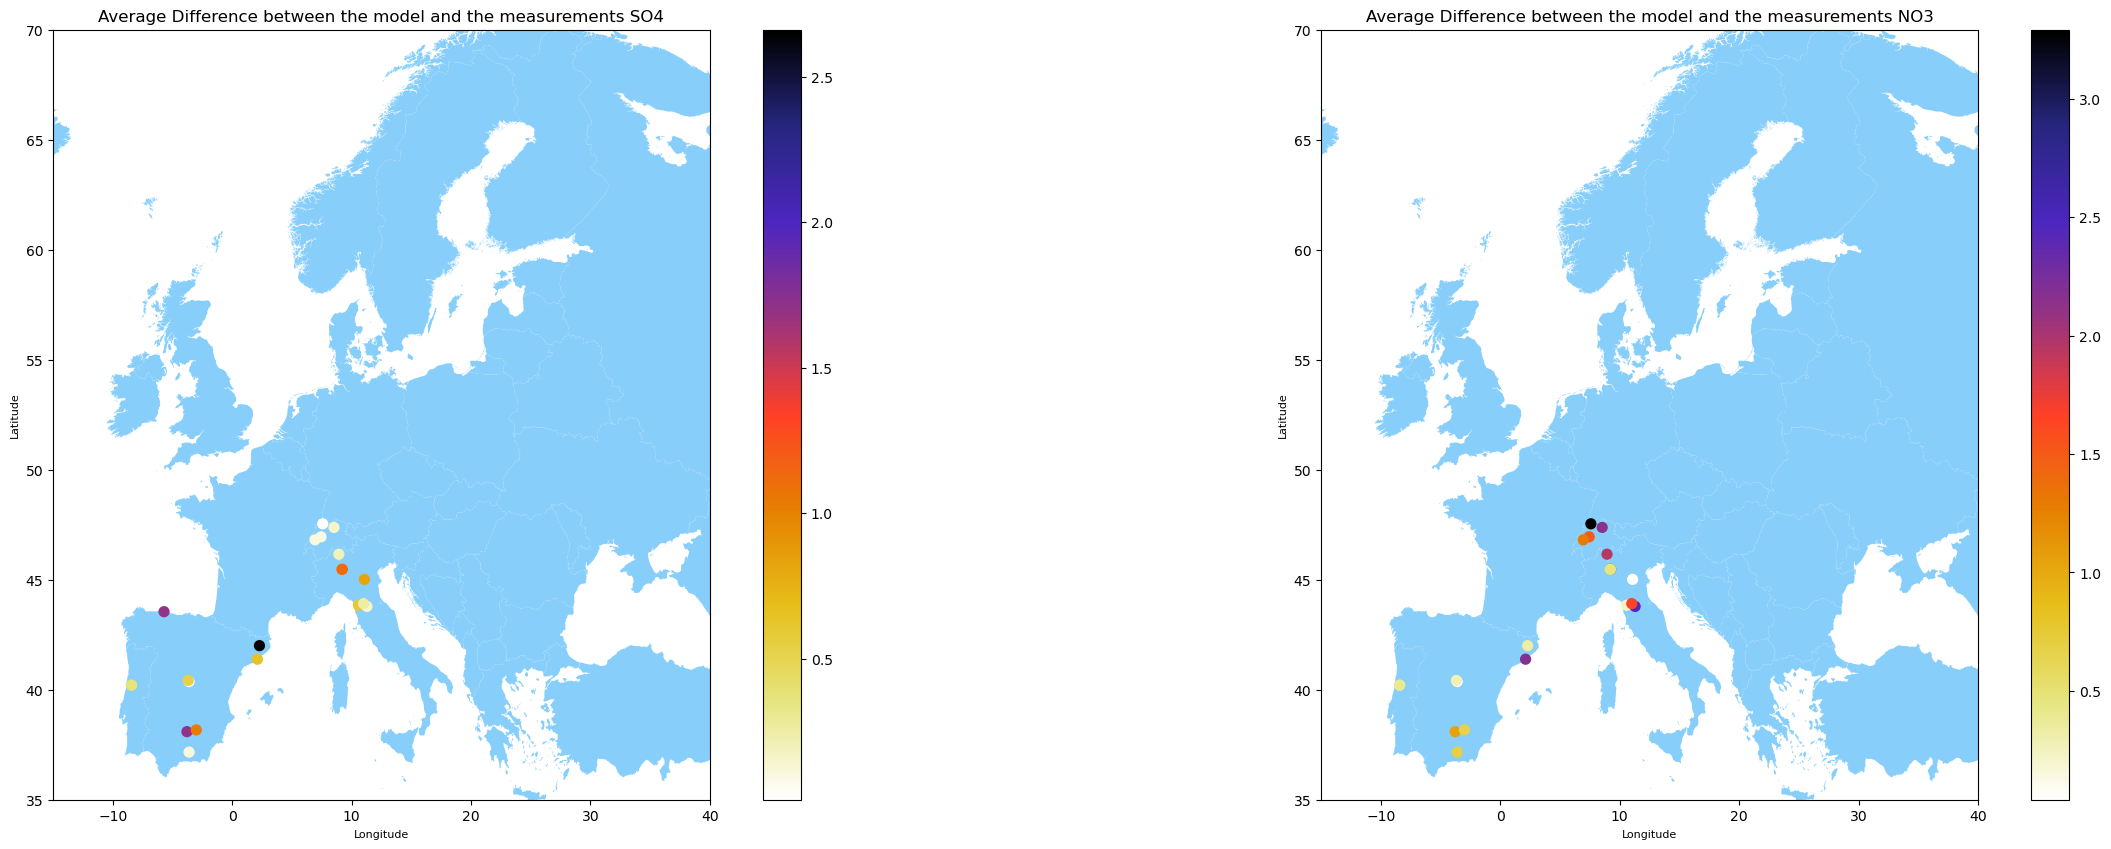

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is read into DF_total
DF_total = pd.read_csv('/Users/guloy/Desktop/merged_output_final.csv')

# Remove rows where 'SO4', 'SO42-', 'NO3', or 'NO3-' are non-numeric
cols_to_check = ['SO4', 'SO42-', 'NO3', 'NO3-']
for col in cols_to_check:
    DF_total = DF_total[pd.to_numeric(DF_total[col], errors='coerce').notnull()]

# Group by station_id
grouped = DF_total.groupby('station_id')

# Create an empty list to store results
results = []

# Calculate the average differences for each group and store in the results list
for station, group in grouped:
    avg_diff_SO4 = abs(group['SO4'].astype(float).mean() - group['SO42-'].astype(float).mean())
    avg_diff_NO3 = abs(group['NO3'].astype(float).mean() - group['NO3-'].astype(float).mean())
    
    # Assuming the latitude and longitude are the same for a given station_id in the group
    lat = group['site_latitude'].iloc[0]
    long = group['site_longitude'].iloc[0]
    
    results.append([station, lat, long, avg_diff_SO4, avg_diff_NO3])

# Convert results to DataFrame
DF_total_2 = pd.DataFrame(results, columns=['station_id', 'Latitude', 'Longitude', 'avg_diff_SO4', 'avg_diff_NO3'])

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

europe_map = gpd.read_file("/Users/guloy/Desktop/BSc Thesis/Surface_plot_stuff/Abhishek/shapefiles_etc")
europe_map.plot(color='lightskyblue', ax=axes[0])
europe_map.plot(color='lightskyblue', ax=axes[1])

# Surface plot for average difference in SO4 and SO42-
scatter_so4 = axes[0].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.avg_diff_SO4,
                              cmap='CMRmap_r', s=50)
axes[0].set_title('Average Difference between the model and the measurements SO4', fontsize=12)
plt.colorbar(scatter_so4, ax=axes[0])

# Surface plot for average difference in NO3 and NO3-
scatter_no3 = axes[1].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.avg_diff_NO3,
                              cmap='CMRmap_r', s=50)
axes[1].set_title('Average Difference between the model and the measurements NO3', fontsize=12)
plt.colorbar(scatter_no3, ax=axes[1])

for ax in axes:
    ax.set_xlabel('Longitude', fontsize=8)
    ax.set_ylabel('Latitude', fontsize=8)
    ax.set_xlim(-15, 40)
    ax.set_ylim(35, 70)

# Show the plot without saving
plt.show()

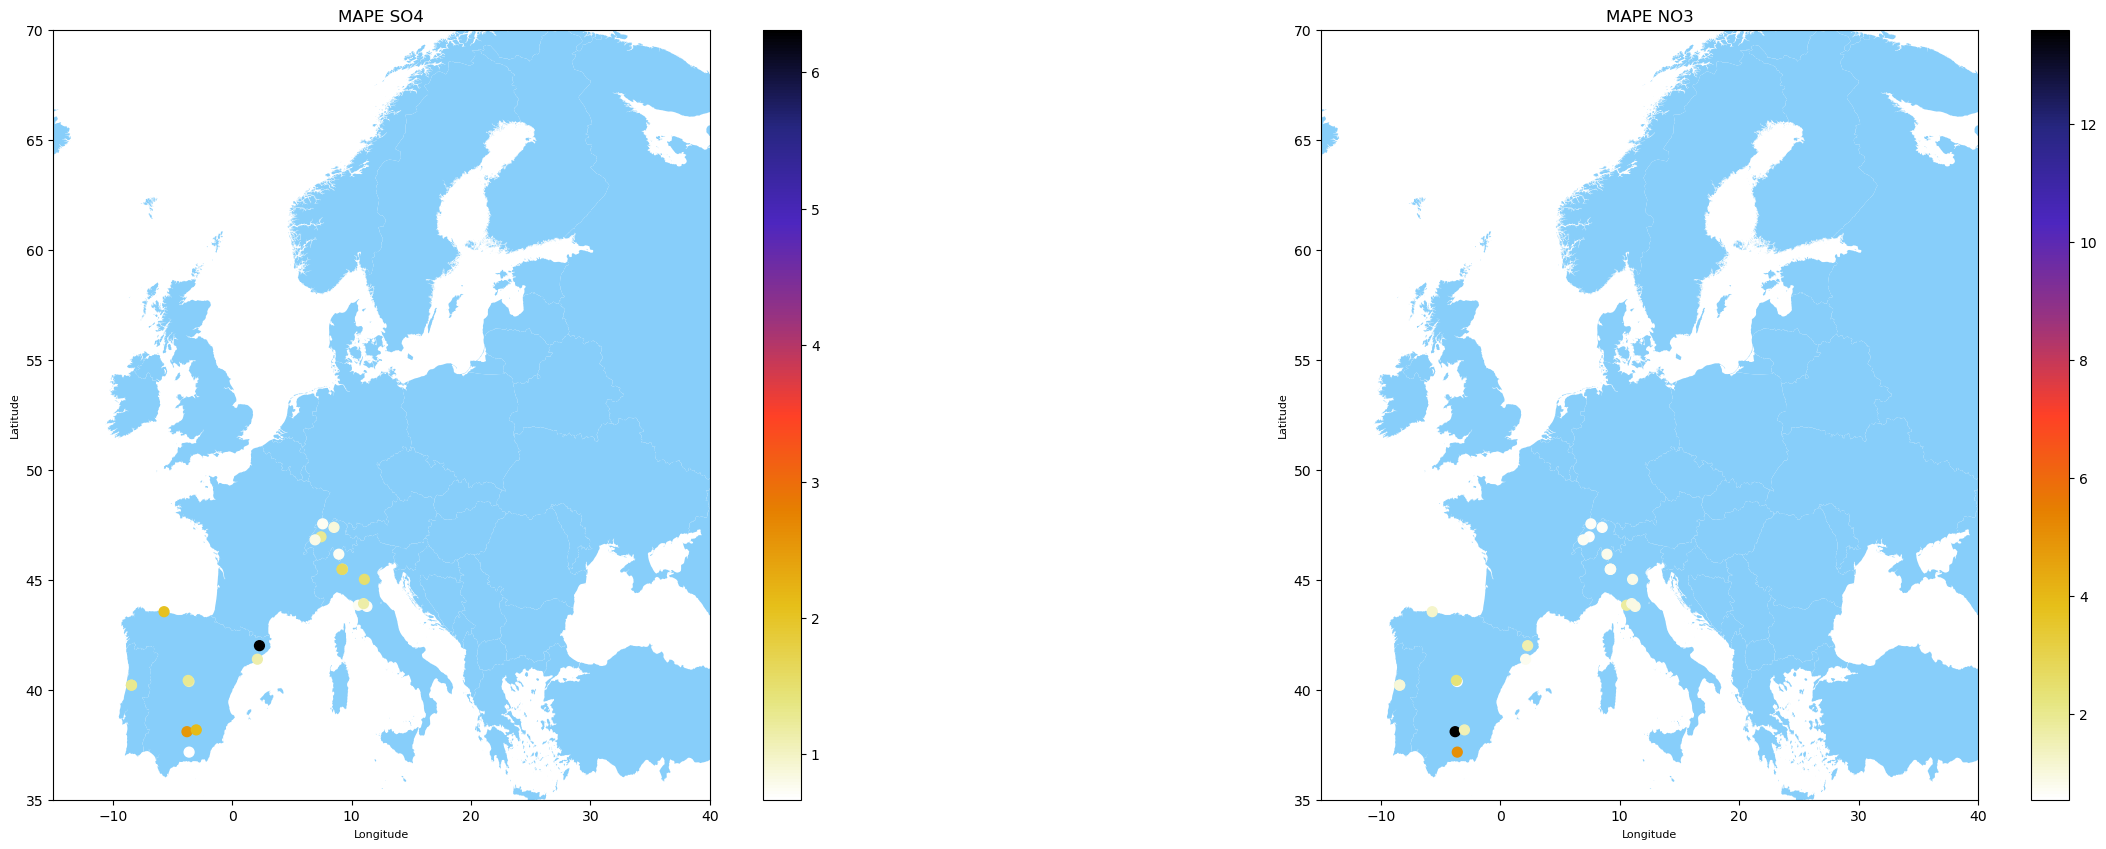

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is read into DF_total
DF_total = pd.read_csv('/Users/guloy/Desktop/merged_output_final.csv')

# Remove rows where 'SO4', 'SO42-', 'NO3', or 'NO3-' are non-numeric
cols_to_check = ['SO4', 'SO42-', 'NO3', 'NO3-']
for col in cols_to_check:
    DF_total = DF_total[pd.to_numeric(DF_total[col], errors='coerce').notnull()]

# Group by station_id
grouped = DF_total.groupby('station_id')

# Create an empty list to store results
results = []

# Calculate the MAPE for each group and store in the results list
for station, group in grouped:
    y_so4 = group['SO4'].astype(float).to_numpy()
    y_so42 = group['SO42-'].astype(float).to_numpy()
    mape_SO4 = np.mean(np.abs((y_so4 - y_so42) / y_so4))

    y_no3 = group['NO3'].astype(float).to_numpy()
    y_no3_neg = group['NO3-'].astype(float).to_numpy()
    mape_NO3 = np.mean(np.abs((y_no3 - y_no3_neg) / y_no3)) 

    # Assuming the latitude and longitude are the same for a given station_id in the group
    lat = group['site_latitude'].iloc[0]
    long = group['site_longitude'].iloc[0]

    results.append([station, lat, long, mape_SO4, mape_NO3])

# Convert results to DataFrame
DF_total_2 = pd.DataFrame(results, columns=['station_id', 'Latitude', 'Longitude', 'MAPE_SO4', 'MAPE_NO3'])

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

europe_map = gpd.read_file("/Users/guloy/Desktop/BSc Thesis/Surface_plot_stuff/Abhishek/shapefiles_etc")
europe_map.plot(color='lightskyblue', ax=axes[0])
europe_map.plot(color='lightskyblue', ax=axes[1])

# Surface plot for MAPE in SO4 and SO42-
scatter_so4 = axes[0].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.MAPE_SO4,
                              cmap='CMRmap_r', s=50)
axes[0].set_title('MAPE SO4', fontsize=12)
plt.colorbar(scatter_so4, ax=axes[0])

# Surface plot for MAPE in NO3 and NO3-
scatter_no3 = axes[1].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.MAPE_NO3,
                              cmap='CMRmap_r', s=50)
axes[1].set_title('MAPE NO3', fontsize=12)
plt.colorbar(scatter_no3, ax=axes[1])

for ax in axes:
    ax.set_xlabel('Longitude', fontsize=8)
    ax.set_ylabel('Latitude', fontsize=8)
    ax.set_xlim(-15, 40)
    ax.set_ylim(35, 70)

# Show the plot without saving
plt.show()

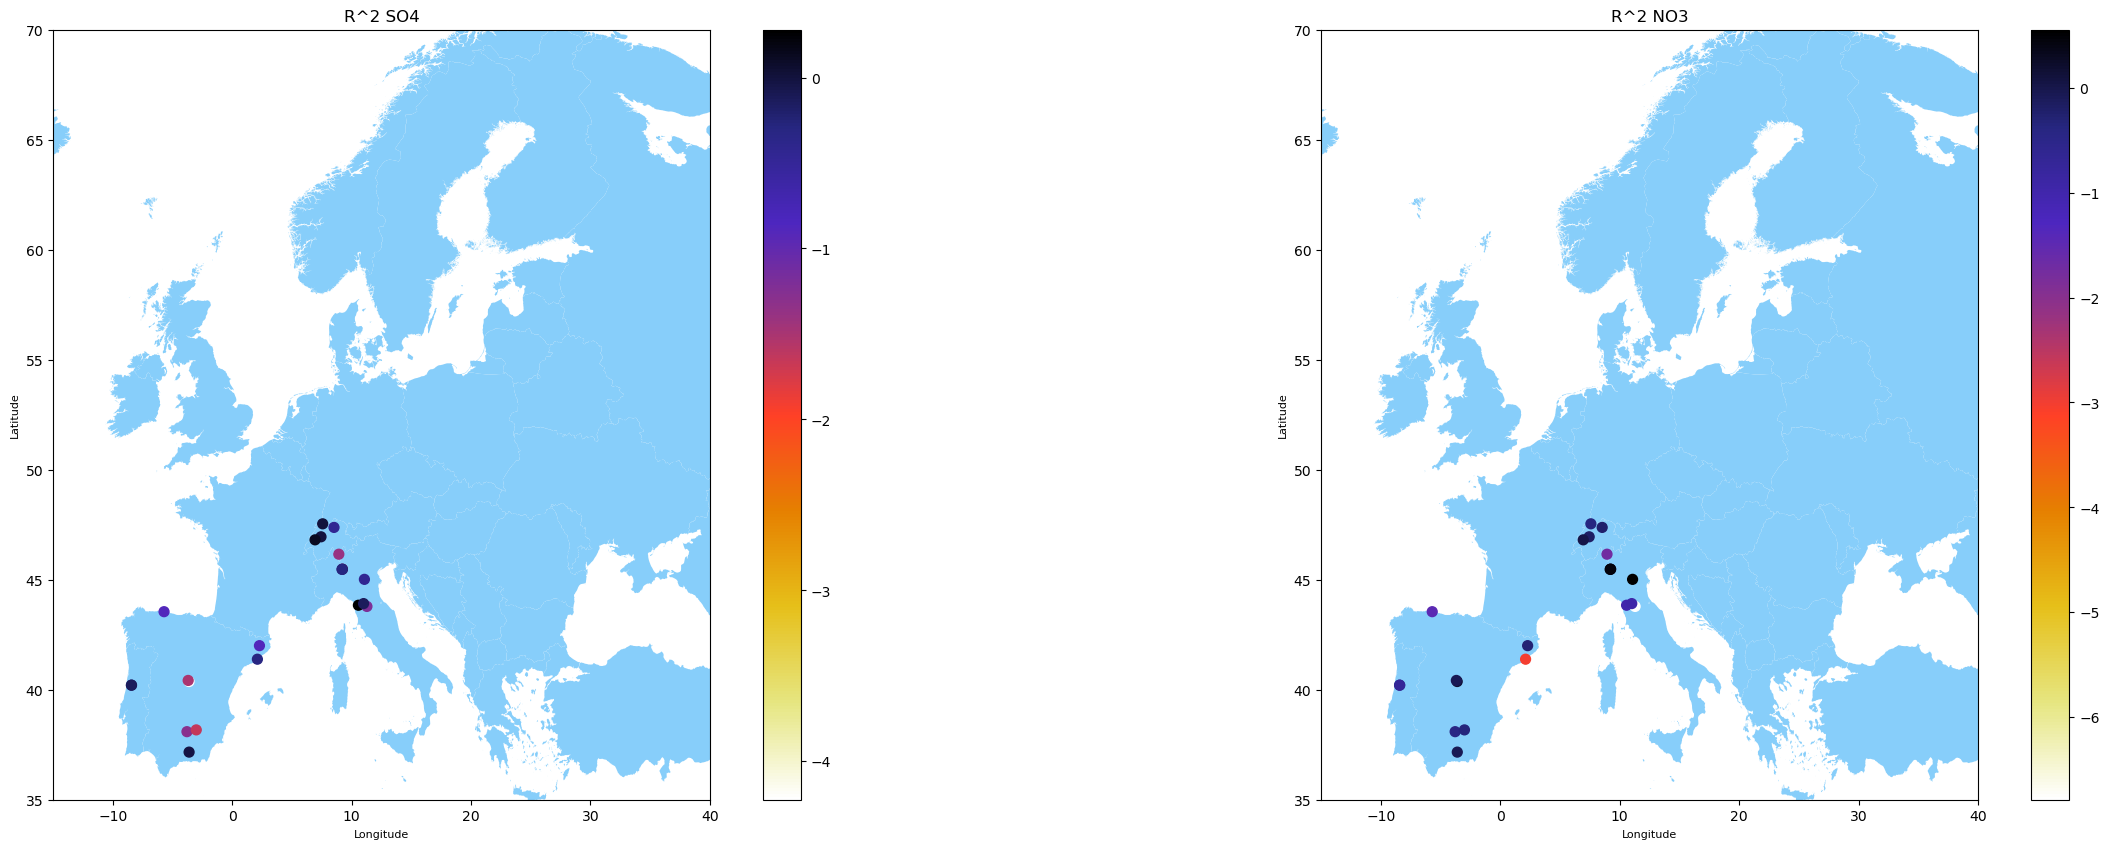

Mean R^2 for SO4: -0.7390
Mean R^2 for NO3: -0.7505


In [5]:

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is read into DF_total
DF_total = pd.read_csv('/Users/guloy/Desktop/merged_output_final.csv')

# Remove rows where 'SO4', 'SO42-', 'NO3', or 'NO3-' are non-numeric
cols_to_check = ['SO4', 'SO42-', 'NO3', 'NO3-']
for col in cols_to_check:
    DF_total = DF_total[pd.to_numeric(DF_total[col], errors='coerce').notnull()]

# Group by station_id
grouped = DF_total.groupby('station_id')

# Create an empty list to store results
results = []

# Function to explicitly calculate R^2
def calculate_r2(y_actual, y_pred):
    ss_res = np.sum((y_actual - y_pred) ** 2)
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Calculate the R^2 for each group and store in the results list
for station, group in grouped:
    y_so4 = group['SO4'].astype(float).to_numpy()
    y_so42 = group['SO42-'].astype(float).to_numpy()
    r2_SO4 = calculate_r2(y_so42, y_so4)
    
    y_no3 = group['NO3'].astype(float).to_numpy()
    y_no3_neg = group['NO3-'].astype(float).to_numpy()
    r2_NO3 = calculate_r2(y_no3_neg, y_no3)

    # Assuming the latitude and longitude are the same for a given station_id in the group
    lat = group['site_latitude'].iloc[0]
    long = group['site_longitude'].iloc[0]
    
    results.append([station, lat, long, r2_SO4, r2_NO3])

# Convert results to DataFrame
DF_total_2 = pd.DataFrame(results, columns=['station_id', 'Latitude', 'Longitude', 'R2_SO4', 'R2_NO3'])


# Visualization
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

europe_map = gpd.read_file("/Users/guloy/Desktop/BSc Thesis/Surface_plot_stuff/Abhishek/shapefiles_etc")
europe_map.plot(color='lightskyblue', ax=axes[0])
europe_map.plot(color='lightskyblue', ax=axes[1])

# Surface plot for R^2 in SO4 and SO42-
scatter_so4 = axes[0].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.R2_SO4,
                              cmap='CMRmap_r', s=50)
axes[0].set_title('R^2 SO4', fontsize=12)
plt.colorbar(scatter_so4, ax=axes[0])

# Surface plot for R^2 in NO3 and NO3-
scatter_no3 = axes[1].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.R2_NO3,
                              cmap='CMRmap_r', s=50)
axes[1].set_title('R^2 NO3', fontsize=12)
plt.colorbar(scatter_no3, ax=axes[1])

for ax in axes:
    ax.set_xlabel('Longitude', fontsize=8)
    ax.set_ylabel('Latitude', fontsize=8)
    ax.set_xlim(-15, 40)
    ax.set_ylim(35, 70)

# Show the plot without saving
plt.show()

# Calculate and print mean R^2 values
mean_r2_SO4 = DF_total_2.R2_SO4.mean()
mean_r2_NO3 = DF_total_2.R2_NO3.mean()

print(f"Mean R^2 for SO4: {mean_r2_SO4:.4f}")
print(f"Mean R^2 for NO3: {mean_r2_NO3:.4f}")

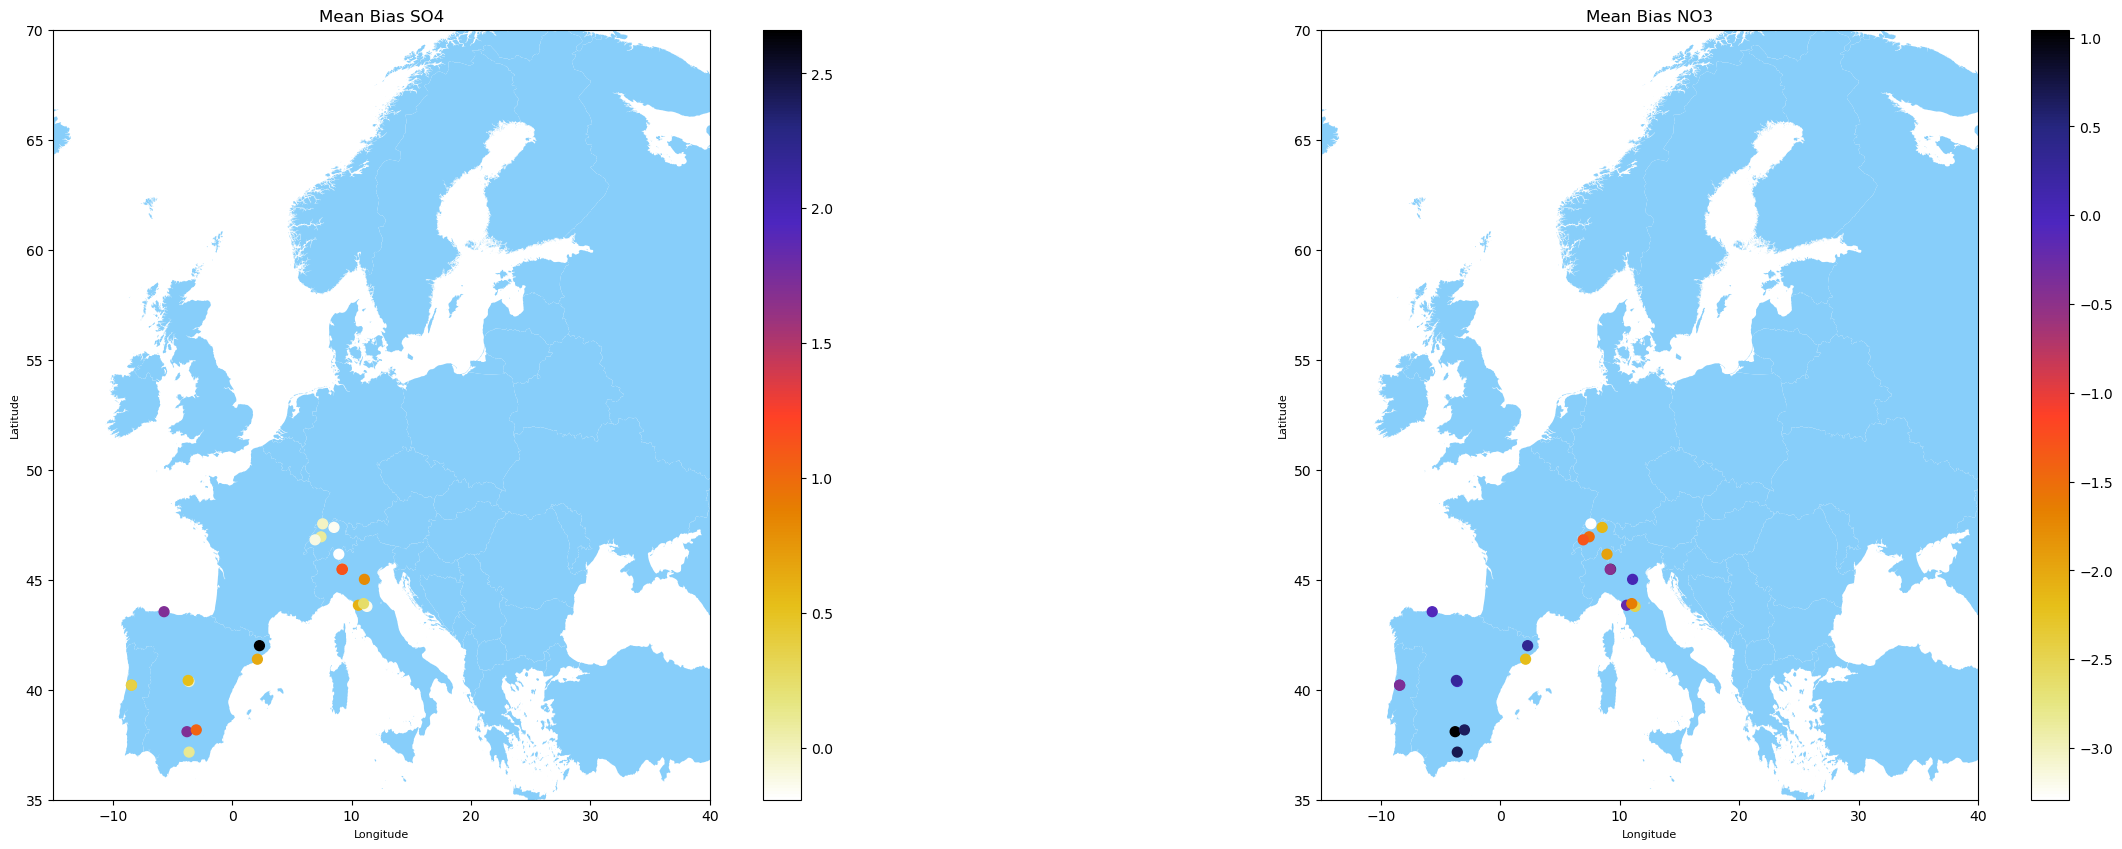

Mean mean bias for SO4: -0.1561
Mean mean bias for NO3: -2.1365


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is read into DF_total
DF_total = pd.read_csv('/Users/guloy/Desktop/merged_output_final.csv')

# Remove rows where 'SO4', 'SO42-', 'NO3', or 'NO3-' are non-numeric
cols_to_check = ['SO4', 'SO42-', 'NO3', 'NO3-']
for col in cols_to_check:
    DF_total = DF_total[pd.to_numeric(DF_total[col], errors='coerce').notnull()]

# Group by station_id
grouped = DF_total.groupby('station_id')

# Create an empty list to store results
results = []

# Calculate the Mean Bias for each group and store in the results list
for station, group in grouped:
    y_so4 = group['SO4'].astype(float).to_numpy()
    y_so42 = group['SO42-'].astype(float).to_numpy()
    mean_bias_SO4 = np.mean(y_so42 - y_so4)

    y_no3 = group['NO3'].astype(float).to_numpy()
    y_no3_neg = group['NO3-'].astype(float).to_numpy()
    mean_bias_NO3 = np.mean(y_no3_neg - y_no3)

    # Assuming the latitude and longitude are the same for a given station_id in the group
    lat = group['site_latitude'].iloc[0]
    long = group['site_longitude'].iloc[0]

    results.append([station, lat, long, mean_bias_SO4, mean_bias_NO3])

# Convert results to DataFrame
DF_total_2 = pd.DataFrame(results, columns=['station_id', 'Latitude', 'Longitude', 'Mean_Bias_SO4', 'Mean_Bias_NO3'])

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

europe_map = gpd.read_file("/Users/guloy/Desktop/BSc Thesis/Surface_plot_stuff/Abhishek/shapefiles_etc")
europe_map.plot(color='lightskyblue', ax=axes[0])
europe_map.plot(color='lightskyblue', ax=axes[1])

# Surface plot for Mean Bias in SO4 and SO42-
scatter_so4 = axes[0].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.Mean_Bias_SO4,
                              cmap='CMRmap_r', s=50)
axes[0].set_title('Mean Bias SO4', fontsize=12)
plt.colorbar(scatter_so4, ax=axes[0])

# Surface plot for Mean Bias in NO3 and NO3-
scatter_no3 = axes[1].scatter(DF_total_2.Longitude, DF_total_2.Latitude, c=DF_total_2.Mean_Bias_NO3,
                              cmap='CMRmap_r', s=50)
axes[1].set_title('Mean Bias NO3', fontsize=12)
plt.colorbar(scatter_no3, ax=axes[1])

for ax in axes:
    ax.set_xlabel('Longitude', fontsize=8)
    ax.set_ylabel('Latitude', fontsize=8)
    ax.set_xlim(-15, 40)
    ax.set_ylim(35, 70)

# Show the plot without saving
plt.show()

# Calculate and print mean R^2 values
Mean_bias_SO4 = DF_total_2.Mean_Bias_SO4.mean()
Mean_bias_NO3 = DF_total_2.Mean_Bias_NO3.mean()

print(f"Mean mean bias for SO4: {mean_bias_SO4:.4f}")
print(f"Mean mean bias for NO3: {mean_bias_NO3:.4f}")